##Color detection Model

In [ ]:
#  install required libraries

!pip install opencv-python
!pip install numpy matplotlib scikit-learn pandas scipy


In [ ]:
import pandas as pd
data=pd.read_csv('/content/color_names.csv')
data.head()

,Name,Hex (24 bit),Red (8 bit),Green (8 bit),Blue (8 bit),Hue (degrees),HSL.S (%),"HSL.L (%), HSV.S (%), HSV.V (%)"
0,Absolute zero,#0048BA,0,72,186,217.0,100.0,37.0
1,Acid green,#B0BF1A,176,191,26,65.0,76.0,43.0
2,Aero,#7CB9E8,124,185,232,206.0,70.0,70.0
3,Aero blue,#C9FFE5,201,255,229,151.0,100.0,89.0
4,African violet,#B284BE,178,132,190,288.0,31.0,63.0


In [ ]:
data.isnull().sum()

,0
Name,0
Hex (24 bit),0
Red (8 bit),0
Green (8 bit),0
Blue (8 bit),0
Hue (degrees),0
HSL.S (%),0
"HSL.L (%), HSV.S (%), HSV.V (%)",0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Name                             1298 non-null   object 
 1   Hex (24 bit)                     1298 non-null   object 
 2   Red (8 bit)                      1298 non-null   int64  
 3   Green (8 bit)                    1298 non-null   int64  
 4   Blue (8 bit)                     1298 non-null   int64  
 5   Hue (degrees)                    1298 non-null   float64
 6   HSL.S (%)                        1298 non-null   float64
 7   HSL.L (%), HSV.S (%), HSV.V (%)  1298 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 81.3+ KB


In [ ]:
data.describe()

,Red (8 bit),Green (8 bit),Blue (8 bit),Hue (degrees),HSL.S (%),"HSL.L (%), HSV.S (%), HSV.V (%)"
count,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000
mean,156.219569,123.720339,118.539291,165.267334,69.074730,52.267334
std,83.553770,74.139138,76.195102,124.259597,30.277587,19.607526
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,95.000000,65.000000,55.000000,39.000000,46.000000,39.000000
50%,170.000000,120.000000,117.500000,168.000000,75.000000,50.000000
75%,232.000000,184.000000,180.000000,288.000000,100.000000,65.000000
max,255.000000,255.000000,255.000000,359.000000,100.000000,100.000000


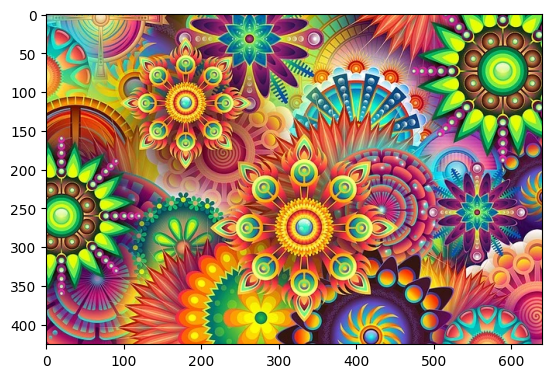

In [ ]:
# prompt: Load an Image and Convert to RGB

import cv2
import numpy as np

def load_and_convert_to_rgb(image_path):

  image = cv2.imread(image_path)
  if image is None:
    print("Error: Could not load image from path:", image_path)
    return None
  rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return rgb_image

# Example usage:
image_path = '/content/mandala.webp'
rgb_image = load_and_convert_to_rgb(image_path)

if rgb_image is not None:
  # You can now process the RGB image, e.g., display it:
  import matplotlib.pyplot as plt
  plt.imshow(rgb_image)
  plt.show()
  pass


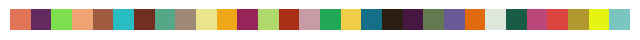

Color 1: RGB (np.int64(225), np.int64(116), np.int64(86))
Color 2: RGB (np.int64(99), np.int64(42), np.int64(95))
Color 3: RGB (np.int64(125), np.int64(222), np.int64(78))
Color 4: RGB (np.int64(239), np.int64(162), np.int64(114))
Color 5: RGB (np.int64(161), np.int64(91), np.int64(65))
Color 6: RGB (np.int64(40), np.int64(189), np.int64(194))
Color 7: RGB (np.int64(113), np.int64(47), np.int64(32))
Color 8: RGB (np.int64(84), np.int64(168), np.int64(136))
Color 9: RGB (np.int64(160), np.int64(136), np.int64(119))
Color 10: RGB (np.int64(234), np.int64(229), np.int64(140))
Color 11: RGB (np.int64(239), np.int64(166), np.int64(23))
Color 12: RGB (np.int64(151), np.int64(37), np.int64(89))
Color 13: RGB (np.int64(175), np.int64(217), np.int64(107))
Color 14: RGB (np.int64(169), np.int64(47), np.int64(22))
Color 15: RGB (np.int64(201), np.int64(155), np.int64(166))
Color 16: RGB (np.int64(33), np.int64(168), np.int64(87))
Color 17: RGB (np.int64(239), np.int64(205), np.int64(70))
Color 18

In [ ]:
from sklearn.cluster import KMeans

# Reshape the image into a 2D array of pixels
pixels = rgb_image.reshape((-1, 3))

# Apply K-Means Clustering
k = 30  # Number of dominant colors to detect
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixels)

# Extract dominant colors
colors = kmeans.cluster_centers_.astype(int)

# Display the detected colors
plt.figure(figsize=(8, 2))
plt.imshow([colors])  # Show the colors
plt.axis("off")
plt.show()

# Print RGB values
for i, color in enumerate(colors):
    print(f"Color {i+1}: RGB {tuple(color)}")


Group 1:


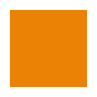

  - RGB (np.int64(236), np.int64(130), np.int64(5))
Group 2:


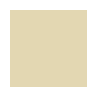

  - RGB (np.int64(227), np.int64(215), np.int64(178))
Group 3:


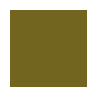

  - RGB (np.int64(114), np.int64(101), np.int64(32))
Group 4:


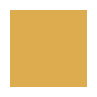

  - RGB (np.int64(220), np.int64(172), np.int64(79))
Group 5:


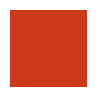

  - RGB (np.int64(203), np.int64(59), np.int64(25))
Group 6:


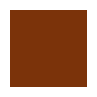

  - RGB (np.int64(123), np.int64(51), np.int64(10))
Group 7:


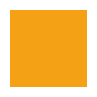

  - RGB (np.int64(244), np.int64(161), np.int64(22))
Group 8:


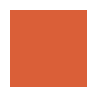

  - RGB (np.int64(218), np.int64(95), np.int64(56))
Group 9:


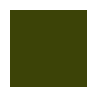

  - RGB (np.int64(60), np.int64(67), np.int64(7))
Group 10:


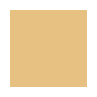

  - RGB (np.int64(230), np.int64(193), np.int64(129))


In [ ]:
#group similar shades together using Euclidean distance. (show colors too)

import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean


# Define a threshold for grouping similar shades
threshold = 30  # Adjust this value as needed

# Group similar colors based on Euclidean distance
color_groups = []
for color in colors:
  assigned_group = None
  for i, group in enumerate(color_groups):
    if euclidean(color, group[0]) <= threshold:
      assigned_group = i
      break
  if assigned_group is not None:
    color_groups[assigned_group].append(color)
  else:
    color_groups.append([color])


# Display the grouped colors
for i, group in enumerate(color_groups):
  print(f"Group {i+1}:")
  plt.figure(figsize=(4,1))
  plt.imshow([np.array(group)])
  plt.axis("off")
  plt.show()
  for color in group:
    print(f"  - RGB {tuple(color)}")


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Name                             1298 non-null   object 
 1   Hex (24 bit)                     1298 non-null   object 
 2   Red (8 bit)                      1298 non-null   int64  
 3   Green (8 bit)                    1298 non-null   int64  
 4   Blue (8 bit)                     1298 non-null   int64  
 5   Hue (degrees)                    1298 non-null   float64
 6   HSL.S (%)                        1298 non-null   float64
 7   HSL.L (%), HSV.S (%), HSV.V (%)  1298 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 81.3+ KB


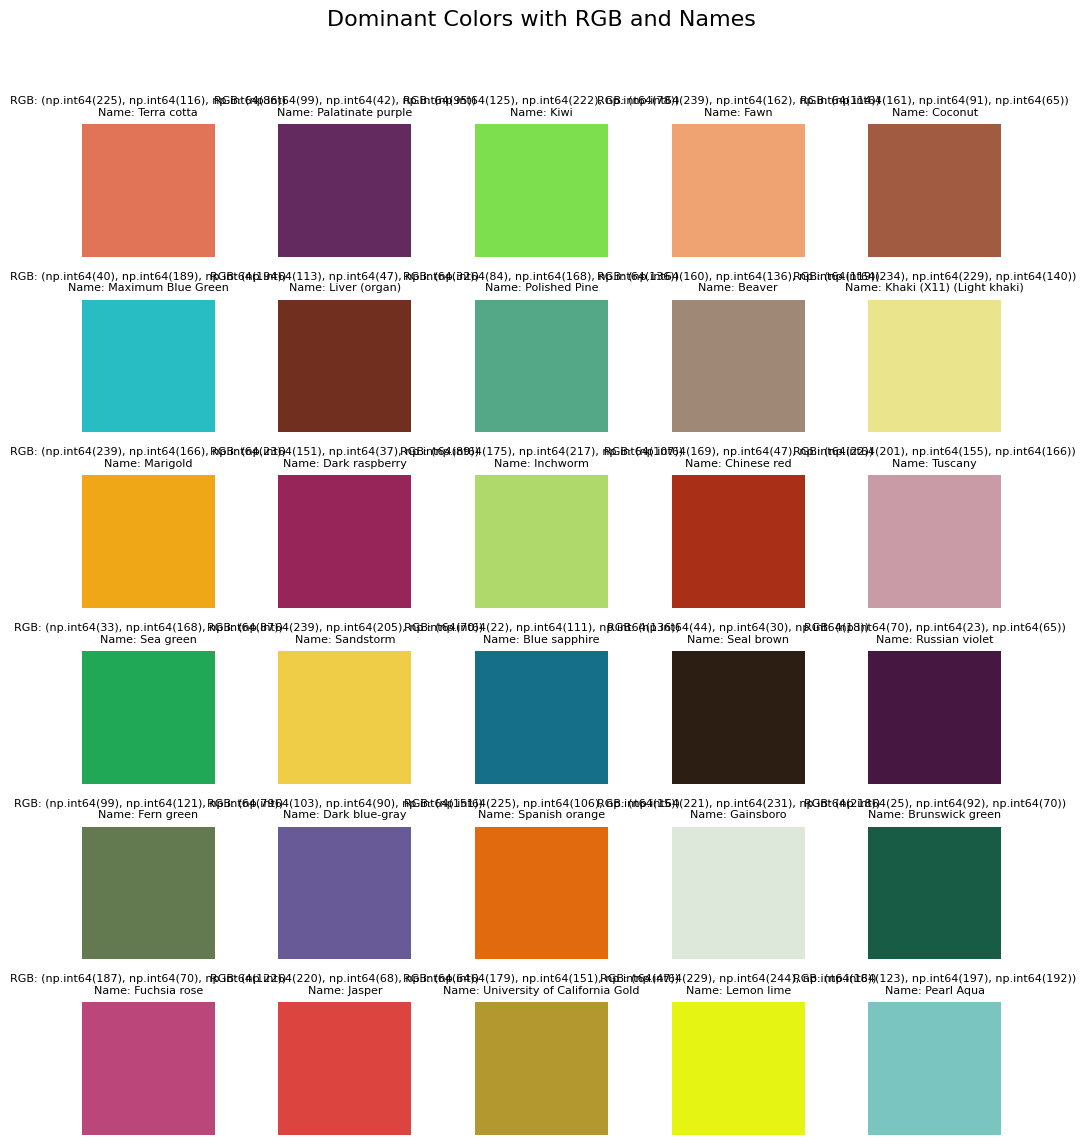

In [ ]:
#  display the colors in grid with their rgb codes and their names
def find_closest_color_name(rgb_tuple, color_data):
  min_distance = float('inf')
  closest_name = None
  for _, row in color_data.iterrows():
    color_name = row['Name']
    rgb_row = (row['Red (8 bit)'], row['Green (8 bit)'], row['Blue (8 bit)'])
    distance = euclidean(rgb_tuple, rgb_row)
    if distance < min_distance:
      min_distance = distance
      closest_name = color_name
  return closest_name


# Create a grid to display colors
rows = len(colors) // 5 + (1 if len(colors) % 5 else 0)
cols = min(5, len(colors))

fig, axs = plt.subplots(rows, cols, figsize=(10, 2 * rows))
fig.suptitle("Dominant Colors with RGB and Names", fontsize=16)


for i, color in enumerate(colors):
  row_idx = i // cols
  col_idx = i % cols

  # Display color patch
  axs[row_idx, col_idx].imshow([[color]])
  axs[row_idx, col_idx].axis("off")

  # Find closest color name from your dataset
  color_name = find_closest_color_name(tuple(color), data)

  # Add labels with RGB and name
  axs[row_idx, col_idx].set_title(f"RGB: {tuple(color)}\nName: {color_name}", fontsize=8)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
